In [1493]:
import frgtools.misc as frgm
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')
import frgtools.xrd as xrd
import pandas as pd
from scipy.signal import savgol_filter
from scipy.signal import find_peaks_cwt
from tqdm import tqdm
import numpy.ma as ma

In [1494]:
# from importlib import reload
# reload(xrd)

# Loading Raw Data File

In [1495]:
fids = frgm.listdir('Data')

Files in 'Data':
0:CsPbF3_AF_nK.ras
1:CsPbF3_AF.ras
2:CsPbF3_B_NK.ras
3:CsPbF3.ras
4:CsPbSnF3_25_5isl.ras
5:CsPbSnF3_25.ras
6:CsPbSnF3_50_5isl.ras
7:CsPbSnF3_50.ras
8:CsPbSnF3_75.ras
9:KPbF3_fast.ras
10:KPbF3.ras
11:RbPbF3.ras


In [1496]:
Name=[''] * len(fids)
Data=[''] * len(fids)
for n in range(0, len(fids), 1):
    Name[n] = fids[n].split('/')[-1].split('.ras')[0]

In [1497]:
# Name

In [1498]:
df = pd.DataFrame(Name, columns = ['Name'])
# df["Name"] = np.nan
df["Date"] = np.nan
df["Time"] = np.nan
df["Type"] = np.nan
df["Scan_Mode"] = np.nan
df["Alpha_1"] = np.nan
df["Alpha_2"] = np.nan
df["Beta_1"] = np.nan
df["Current"] = np.nan
df["Voltage"] = np.nan
df["Scan_Axis"] = np.nan
df["Speed"] = np.nan
df["Speed_Units"] = np.nan
df["Step_Size"] = np.nan
df["Aperture_Size"] = np.nan
df["Slot_1"] = np.nan
df["Slot_2"] = np.nan
df["Start"] = np.nan
df["Stop"] = np.nan

df["Angles"] = np.nan
df["Counts_Raw"] = np.nan
df["Counts_Norm"] = np.nan
df["Counts_F1"] = np.nan
df["Peak_Index"] = np.nan
df["Peak_Angle"] = np.nan
df["Counts_F4"] = np.nan
df["Peak_Intensity"] = np.nan

In [1499]:
# df

In [1500]:
df = df.astype('object')

for n in range(0, len(fids), 1):
    Data[n] = xrd.LoadSmartlab(fids[n])

# for n in range(0, len(fids), 1):
for n in range(len(Samples)):

    df.at[n,'Date'] = Data[n]['date']
    df.at[n, 'Time'] = Data[n]['time']
    df.at[n, 'Type'] = Data[n]['header']['MEAS_COND_OPT_ATTR']
    df.at[n, 'Scan_Mode'] = Data[n]['scanmode']
    
    df.at[n, 'Alpha_1'] = float(Data[n]['header']['HW_XG_WAVE_LENGTH_ALPHA1'])
    df.at[n, 'Alpha_2'] = float(Data[n]['header']['HW_XG_WAVE_LENGTH_ALPHA2'])
    df.at[n, 'Beta_1'] = float(Data[n]['header']['HW_XG_WAVE_LENGTH_BETA']) 
    
    df.at[n, 'Current'] = float(Data[n]['header']['MEAS_COND_XG_CURRENT'])
    df.at[n, 'Voltage'] = float(Data[n]['header']['MEAS_COND_XG_VOLTAGE'])
    df.at[n, 'Scan_Axis'] = Data[n]['header']['MEAS_SCAN_AXIS_X']  
    df.at[n, 'Speed'] = Data[n]['header']['MEAS_SCAN_SPEED_USER']  
    df.at[n, 'Speed_Units'] = Data[n]['header']['MEAS_SCAN_SPEED_UNIT']  
    df.at[n, 'Step_Size'] = float(Data[n]['header']['MEAS_SCAN_STEP'])
    
    df.at[n, 'Aperture_Size'] = Data[n]['header']['MEAS_COND_AXIS_POSITION-22']  
    df.at[n, 'Slot_1'] = Data[n]['header']['MEAS_COND_AXIS_POSITION-27']  
    df.at[n, 'Slot_2'] = Data[n]['header']['MEAS_COND_AXIS_POSITION-28']  
    
    df.at[n, 'Start'] = float(Data[n]['header']['MEAS_SCAN_START'])
    df.at[n, 'Stop'] = float(Data[n]['header']['MEAS_SCAN_STOP'])

    df.at[n, 'Angles'] = Data[n]['angles']
    df.at[n, 'Counts_Raw'] = Data[n]['counts']

In [1501]:
# df

In [1502]:
# Filtering out bugged curves (manual entry)
# df = df[df.Name != 'KPbF3_fast']

# plotting a subset of experiment
# filter condition 1:
df_filter1 = df[df.Name.str.contains("CsPb")]
# filter condition 2:
df_filter2 = df_filter1[df_filter1.Name.str.contains("AF_nK")]

# # filter condition 3: #1 = reverse, #2 = forward, depends on actual settings when measurement taken
# df_filter3 = df_filter2[df_filter2.Type.str.contains("2")]

df_filter2.reset_index(drop=True, inplace=True)

# observing your dataset before plotting
df_filter2

,Name,Date,Time,Type,Scan_Mode,Alpha_1,Alpha_2,Beta_1,Current,Voltage,...,Start,Stop,Angles,Counts_Raw,Counts_Norm,Counts_F1,Peak_Index,Peak_Angle,Counts_F4,Peak_Intensity
0,CsPbF3_AF_nK,07/16/19,18:40:43,Bragg-Brentano focusing,CONTINUOUS,1.54059,1.54441,1.39225,30,40,...,15,90,"[15.0, 15.01, 15.02, 15.03, 15.04, 15.05, 15.0...","[3.0, 2.0, 3.0, 4.0, 4.0, 4.0, 1.0, 1.0, 4.0, ...",NaN,NaN,NaN,NaN,NaN,NaN


## Looking at selected plots preprocessed

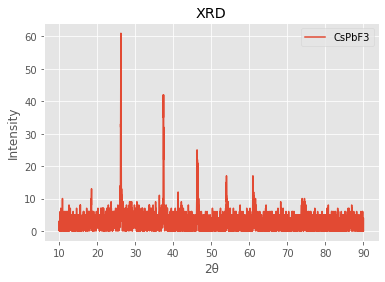

In [1515]:
# filtered DataFrame to Plot
DF = df_filter2

# single
q = 3
plt.plot(DF.loc[q]['Angles'],DF.loc[q]['Counts_Raw'], label=Name[q])


# multiple:
# for q in range (0, len(DF), 1):

#     plt.plot(DF.loc[q]['Angles'],DF.loc[q]['Counts_Raw'], label=Name[q])

plt.legend()
plt.title('XRD')
# plt.ylim(0,25)
# plt.xlim(0,1.2)

plt.ylabel('Intensity')
plt.xlabel('2θ')
plt.show()

In [1504]:
row, col=np.shape(df)
row

12

## Normalizng All XRD Data

In [1505]:
for n in tqdm(range(0, row, 1)):
    df['Counts_Norm'][n] = (df['Counts_Raw'][n]/ max(df['Counts_Raw'][n])).round(3)

100%|██████████| 12/12 [00:00<00:00, 757.48it/s]


## Noise Filtering

In [1506]:
#savgol_filter to smooth the data
for n in tqdm(range(0, row, 1)): # smothing filter
    df['Counts_F1'][n] = (savgol_filter(df['Counts_Norm'][n], 31, 3)).round(3)


100%|██████████| 12/12 [00:00<00:00, 1051.34it/s]


## Peak Indexing

In [1507]:
for n in tqdm(range(0, row, 1)): #peak index in angle array
     df['Peak_Index'][n] = find_peaks_cwt(df['Counts_F1'][n], np.arange(10,15), noise_perc=0.02)

for j in tqdm(range(0, row, 1)): #peak angles
    test_list = []
    for n in range(0, len(df['Peak_Index'][j])):
        test_list.append(df['Angles'][j][df['Peak_Index'][j][n]])
        test_list_2 = np.round(test_list,2)
        [float(i) for i in test_list_2]
        df.at[j, 'Peak_Angle'] = test_list_2
        
for n in range(0, row, 1): 
    df['Peak_Angle'][n] = np.asarray(df['Peak_Angle'][n])

100%|██████████| 12/12 [00:00<00:00, 686.62it/s]


## Background Subtraction, Re-Normalization, and adding peak Values

In [1508]:
window = 12//2 #arbitary guess at width of peaks errors out of window spills over index
                #this can happen if peak is located near end of index
background=[]
for j in range(0, row, 1): #peak angles
    leftofpeak = []
    rightofpeak = []
    for n in range(0, len(df['Peak_Index'][j])):
#         try:
            leftofpeak.append(df['Counts_F1'][j][df['Peak_Index'][j][n]-window])
            rightofpeak.append(df['Counts_F1'][j][df['Peak_Index'][j][n]+window])
        
        
background=['']*len(leftofpeak)

for n in range(0, len(leftofpeak)): # a more robust math function can be used here i guess
    background[n] = np.round((leftofpeak[n] + rightofpeak[n]) / 2,4)

    
for n in tqdm(range(0, row, 1)): #peak index in angle array
    df['Counts_F4'][n] = df['Counts_F1'][n]-background[n]
    df['Counts_F4'][n][df['Counts_F4'][n]< 0] = 0
    df['Counts_F4'][n] = (df['Counts_F4'][n]/ max(df['Counts_F4'][n])).round(3)

for j in range(0, row, 1): #peak angles
    somelist = []
    for n in range(0, len(df['Peak_Index'][j])):
        somelist.append(df['Counts_F4'][j][df['Peak_Index'][j][n]])
#         df['Peak_Intensity'][j] = somelist[n]

        [float(i) for i in somelist]
#         somelist=np.asarray(somelist)
        df.at[j, 'Peak_Intensity'] = somelist
    
for n in range(0, row, 1): 
    df['Peak_Intensity'][n] = np.asarray(df['Peak_Intensity'][n])

100%|██████████| 12/12 [00:00<00:00, 731.93it/s]


## Now refinding Peaks after all processing


In [1509]:
# for n in tqdm(range(0, row, 1)): #peak index in angle array
#      df['Peak_Index'][n] = find_peaks_cwt(df['Counts_F4'][n], np.arange(10,15), noise_perc=0.02)

# for j in tqdm(range(0, row, 1)): #peak angles
#     test_list = []
#     for n in range(0, len(df['Peak_Index'][j])):
#         test_list.append(df['Angles'][j][df['Peak_Index'][j][n]])
#         test_list_2 = np.round(test_list,2)
#         [float(i) for i in test_list_2]
#         df.at[j, 'Peak_Angle'] = test_list_2
        
# for n in range(0, row, 1): 
#     df['Peak_Angle'][n] = np.asarray(df['Peak_Angle'][n])
    
# window = 8//2 #arbitary guess at width of peaks errors out of window spills over index
#                 #this can happen if peak is located near end of index
# background=[]
# for j in range(0, row, 1): #peak angles
#     leftofpeak = []
#     rightofpeak = []
#     for n in range(0, len(df['Peak_Index'][j])):
# #         try:
#             leftofpeak.append(df['Counts_F4'][j][df['Peak_Index'][j][n]-window])
#             rightofpeak.append(df['Counts_F4'][j][df['Peak_Index'][j][n]+window])
        
        
# background=['']*len(leftofpeak)

# for n in range(0, len(leftofpeak)): # a more robust math function can be used here i guess
#     background[n] = np.round((leftofpeak[n] + rightofpeak[n]) / 2,4)

    
# for n in tqdm(range(0, row, 1)): #peak index in angle array
#     df['Counts_F4'][n] = df['Counts_F4'][n]-background[n]
#     df['Counts_F4'][n][df['Counts_F4'][n]< 0] = 0
#     df['Counts_F4'][n] = (df['Counts_F4'][n]/ max(df['Counts_F4'][0])).round(3)

# for j in range(0, row, 1): #peak angles
#     somelist = []
#     for n in range(0, len(df['Peak_Index'][j])):
#         somelist.append(df['Counts_F4'][j][df['Peak_Index'][j][n]])
# #         df['Peak_Intensity'][j] = somelist[n]

#         [float(i) for i in somelist]
# #         somelist=np.asarray(somelist)
#         df.at[j, 'Peak_Intensity'] = somelist
    
# for n in range(0, row, 1): 
#     df['Peak_Intensity'][n] = np.asarray(df['Peak_Intensity'][n])

### Checking background sum value: need to write a fx to minimize on this value

In [1510]:
background
total=0
for n in range(0, len(background)): 
    total = total + background[n]
total

2.5585

### Now Refiltering to Interested Samples

In [1511]:
df_filter1 = df[df.Name.str.contains("CsPb")]
# filter condition 2:
df_filter2 = df_filter1[df_filter1.Name.str.contains("")]

# # filter condition 3: #1 = reverse, #2 = forward, depends on actual settings when measurement taken
# df_filter3 = df_filter2[df_filter2.Type.str.contains("2")]

df_filter2.reset_index(drop=True, inplace=True)

# observing your dataset before plotting
df_filter2

,Name,Date,Time,Type,Scan_Mode,Alpha_1,Alpha_2,Beta_1,Current,Voltage,...,Start,Stop,Angles,Counts_Raw,Counts_Norm,Counts_F1,Peak_Index,Peak_Angle,Counts_F4,Peak_Intensity
0,CsPbF3_AF_nK,07/16/19,18:40:43,Bragg-Brentano focusing,CONTINUOUS,1.54059,1.54441,1.39225,30,40,...,15,90,"[15.0, 15.01, 15.02, 15.03, 15.04, 15.05, 15.0...","[3.0, 2.0, 3.0, 4.0, 4.0, 4.0, 1.0, 1.0, 4.0, ...","[0.026, 0.017, 0.026, 0.035, 0.035, 0.035, 0.0...","[0.025, 0.024, 0.024, 0.025, 0.025, 0.025, 0.0...","[14, 350, 1129, 1743, 2249, 2709, 3132, 3899, ...","[15.14, 18.5, 26.29, 32.43, 37.49, 42.09, 46.3...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.031, 1.0, 0.0, 0.289, 0.012, 0.433, 0...."
1,CsPbF3_AF,07/16/19,13:36:21,Bragg-Brentano focusing,CONTINUOUS,1.54059,1.54441,1.39225,30,40,...,15,90,"[15.0, 15.01, 15.02, 15.03, 15.04, 15.05, 15.0...","[242.0, 244.0, 224.0, 266.0, 238.0, 242.0, 251...","[0.367, 0.37, 0.34, 0.404, 0.361, 0.367, 0.381...","[0.372, 0.37, 0.369, 0.369, 0.368, 0.368, 0.36...","[10, 345, 1114, 1466, 2237, 2696, 2750, 3117, ...","[15.1, 18.45, 26.14, 29.66, 37.37, 41.96, 42.5...","[0.358, 0.356, 0.354, 0.354, 0.353, 0.353, 0.3...","[0.359, 0.475, 1.0, 0.17, 0.292, 0.051, 0.058,..."
2,CsPbF3_B_NK,05/02/19,12:27:26,Bragg-Brentano focusing,CONTINUOUS,1.54059,1.54441,1.39225,30,40,...,10,90,"[10.0, 10.01, 10.02, 10.03, 10.04, 10.05, 10.0...","[4.0, 8.0, 4.0, 5.0, 6.0, 3.0, 6.0, 7.0, 5.0, ...","[0.029, 0.058, 0.029, 0.036, 0.043, 0.022, 0.0...","[0.032, 0.035, 0.037, 0.039, 0.041, 0.043, 0.0...","[11, 92, 236, 855, 1379, 1631, 2470, 2751, 321...","[10.11, 10.92, 12.36, 18.55, 23.79, 26.31, 34....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.001, 0.0..."
3,CsPbF3,04/04/19,12:32:03,Bragg-Brentano focusing,CONTINUOUS,1.54059,1.54441,1.39225,30,40,...,10,90,"[10.0, 10.01, 10.02, 10.03, 10.04, 10.05, 10.0...","[1.0, 2.0, 3.0, 3.0, 0.0, 3.0, 0.0, 1.0, 3.0, ...","[0.016, 0.033, 0.049, 0.049, 0.0, 0.049, 0.0, ...","[0.028, 0.029, 0.029, 0.029, 0.03, 0.03, 0.03,...","[32, 94, 849, 1151, 1626, 1990, 2747, 3209, 36...","[10.32, 10.94, 18.49, 21.51, 26.26, 29.9, 37.4...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.084, 0.0, 1.0, 0.003, 0.731, 0.01..."
4,CsPbSnF3_25_5isl,06/05/19,14:15:35,Bragg-Brentano focusing,CONTINUOUS,1.54059,1.54441,1.39225,30,40,...,10,60,"[10.0, 10.01, 10.02, 10.03, 10.04, 10.05, 10.0...","[7.0, 3.0, 4.0, 6.0, 6.0, 2.0, 9.0, 5.0, 6.0, ...","[0.091, 0.039, 0.052, 0.078, 0.078, 0.026, 0.1...","[0.061, 0.064, 0.066, 0.069, 0.072, 0.075, 0.0...","[14, 151, 407, 906, 1406, 1716, 1926, 2134, 23...","[10.14, 11.51, 14.07, 19.06, 24.06, 27.16, 29....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.717, 0.879, 1.0, 0.372,..."
5,CsPbSnF3_25,06/05/19,12:40:13,Bragg-Brentano focusing,CONTINUOUS,1.54059,1.54441,1.39225,30,40,...,10,60,"[10.0, 10.01, 10.02, 10.03, 10.04, 10.05, 10.0...","[4.0, 8.0, 8.0, 5.0, 5.0, 6.0, 6.0, 5.0, 2.0, ...","[0.038, 0.076, 0.076, 0.048, 0.048, 0.057, 0.0...","[0.057, 0.057, 0.056, 0.055, 0.054, 0.054, 0.0...","[9, 551, 854, 1201, 1407, 1652, 1830, 2136, 26...","[10.09, 15.51, 18.54, 22.01, 24.07, 26.52, 28....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.004, 0.0, 0.329, 1.0, 0.212, 0.25..."
6,CsPbSnF3_50_5isl,06/05/19,13:57:10,Bragg-Brentano focusing,CONTINUOUS,1.54059,1.54441,1.39225,30,40,...,10,60,"[10.0, 10.01, 10.02, 10.03, 10.04, 10.05, 10.0...","[7.0, 3.0, 1.0, 8.0, 7.0, 5.0, 7.0, 3.0, 6.0, ...","[0.083, 0.036, 0.012, 0.095, 0.083, 0.06, 0.08...","[0.06, 0.06, 0.061, 0.061, 0.061, 0.06, 0.06, ...","[10, 88, 368, 913, 969, 1408, 1833, 2138, 2750...","[10.1, 10.88, 13.68, 19.13, 19.69, 24.08, 28.3...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.017, 0.0, 0.0..."
7,CsPbSnF3_50,06/05/19,13:18:42,Bragg-Brentano focusing,CONTINUOUS,1.54059,1.54441,1.39225,30,40,...,10,60,"[10.0, 10.01, 10.02, 10.03, 10.04, 10.05, 10.0...","[3.

### Now Plotting Processed Data

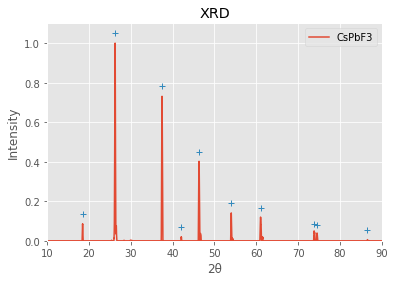

In [1513]:
# filtered DataFrame to Plot
DF = df_filter2

# plotting single use:
q = 3
#masking out bad peaks
a = DF['Peak_Intensity'][q]
a = np.ma.masked_where(a <= 0.005 , a)

#plotting
plt.plot(DF.loc[q]['Angles'],DF.loc[q]['Counts_F4'], label=Name[q])
plt.plot(DF['Peak_Angle'][q],a+.05,'+')

# plotting multiple use:
# for q in range (0, len(DF), 1):
#     #masking out bad peaks
#     a = DF['Peak_Intensity'][q]
#     a = np.ma.masked_where(a <= 0.005 , a)
    
#     #plotting
#     plt.plot(DF.loc[q]['Angles'],DF.loc[q]['Counts_F4'], label=Name[q])
#     plt.plot(DF['Peak_Angle'][q],a+.05,'+',label=Name[q])


plt.legend()
plt.title('XRD')
plt.ylim(0,1.1)
plt.xlim(min(DF.loc[q]['Angles']),max(DF.loc[q]['Angles']))

plt.ylabel('Intensity')
plt.xlabel('2θ')
plt.show()